In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
#pip install --upgrade matplotlib

In [45]:
california_house = sklearn.datasets.fetch_california_housing()

In [46]:
california_house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [47]:
california_house_df = pd.DataFrame(california_house.data , columns=california_house.feature_names)

In [48]:
california_house_df['price'] = california_house.target

In [49]:
california_house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [50]:
X = california_house_df.drop('price' , axis=1)
Y = california_house_df['price']

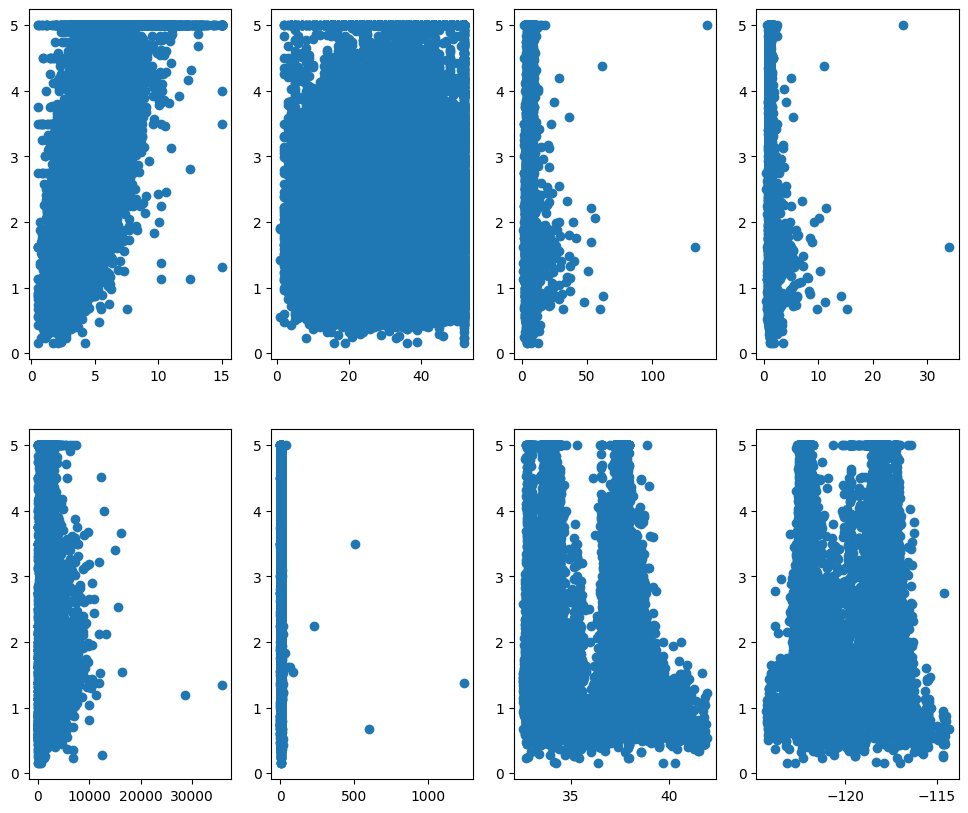

In [51]:
fig , ax = plt.subplots(2 , 4 , figsize=(12 , 10))

ax[0 ,0].scatter(X['MedInc'] , Y )
ax[0 ,1].scatter(X['HouseAge'] ,Y)
ax[0 ,2].scatter(X['AveRooms'] , Y)
ax[0, 3].scatter(X['AveBedrms'] , Y)
ax[1 ,0].scatter(X['Population'] , Y)
ax[1 ,1].scatter(X['AveOccup'] , Y)
ax[1 ,2].scatter(X['Latitude'] , Y)
ax[1 ,3].scatter(X['Longitude'] , Y)

plt.show()

In [52]:
X_train , X_test  , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state=3)

In [53]:
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(14448, 8) (14448,)
(6192, 8) (6192,)


In [54]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [55]:
# fig , ax = plt.subplots(2 , 4 , figsize=(12 , 10))

# ax[0 ,0].scatter(X_train_norm['MedInc'] , Y )
# ax[0 ,1].scatter(X_train_norm['HouseAge'] ,Y)
# ax[0 ,2].scatter(X_train_norm['AveRooms'] , Y)
# ax[0, 3].scatter(X_train_norm['AveRooms'] , Y)
# ax[1 ,0].scatter(X_train_norm['Population'] , Y)
# ax[1 ,1].scatter(X_train_norm['AveOccup'] , Y)
# ax[1 ,2].scatter(X_train_norm['Latitude'] , Y)
# ax[1 ,3].scatter(X_train_norm['Longitude'] , Y)

# plt.show()
# plt.scatter(X_train_norm['MedInc'] , Y)

In [102]:
sgr = SGDRegressor(loss='squared_error' , alpha=0.4 , max_iter = 100)
sgr.fit(X_train_norm , Y_train)
print(sgr)
print(f'number of iters taken: {sgr.n_iter_} , number of weight updates: {sgr.t_}')

SGDRegressor(alpha=0.4, max_iter=100)
number of iters taken: 7 , number of weight updates: 101137.0


In [105]:
b_wt = sgr.intercept_
w_wt = sgr.coef_
print(f'weights : {w_wt}')
print(f'bias : {b_wt}')

weights : [ 0.56913744  0.13228797  0.03457878 -0.00193292 -0.00658053 -0.03563295
 -0.17822269 -0.14674062]
bias : [2.06032737]


In [103]:
Y_train_predict = sgr.predict(X_train_norm)

In [59]:
print(Y_train_predict)
print(Y_train_predict.shape)

[1.98652144 1.31838692 1.33253235 ... 2.8242803  2.83442745 1.90805009]
(14448,)


In [107]:
from sklearn import metrics
msr = mean_squared_error(Y_train , Y_train_predict)

r2_err = metrics.mean_absolute_error(Y_train , Y_train_predict)

print(f'Mean squared error: {msr}')
print(f'R2 error: {r2_err}')

Mean squared error: 0.6789651936138231
R2 error: 0.6257203160845372


In [61]:
X_test_norm = scaler.fit_transform(X_test)
Y_test_predict = sgr.predict(X_test_norm)

In [108]:
print(Y_test_predict  , Y_test_predict.shape)

[1.87137832 0.31002054 2.01012673 ... 2.1097657  1.18001793 2.70545536] (6192,)


In [109]:
from sklearn import metrics
msr2 = mean_squared_error(Y_test , Y_test_predict)

r2_err2 = metrics.mean_absolute_error(Y_test , Y_test_predict)

print(f'Mean squared error: {msr2:0.4f}')
print(f'R2 error: {r2_err2}')

Mean squared error: 0.5106
R2 error: 0.530228077004289


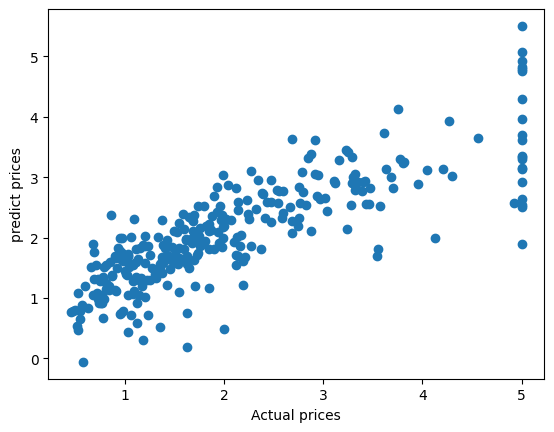

In [64]:
plt.scatter(Y_test[:300], Y_test_predict[:300])
plt.xlabel('Actual prices')
plt.ylabel('predict prices')
plt.show()

In [65]:
X_features = ['MedInc' , 'HouseAge' , 'AveRooms' , 'AveBedrms' , 'Population' , 'AveOccup', 'Latitude' , 'Longitude']

In [70]:
# fig, ax = plt.subplots(1, 8, sharey=True)

# for i in range(len(X_features)):
#     ax[i].scatter(X_test[i], Y_test, color='blue', label='target')
#     ax[i].set_xlabel(X_features[i])
#     ax[i].scatter(X_test[i], Y_test_predict, color='orange', label='predict')
#     ax[i].legend()  # Show legend for each subplot
# ax[0].set_ylabel('prices (1k$)')  # Use set_ylabel instead of ylabel
# fig.suptitle("target versus prediction using z-score normalized model")
# plt.show()

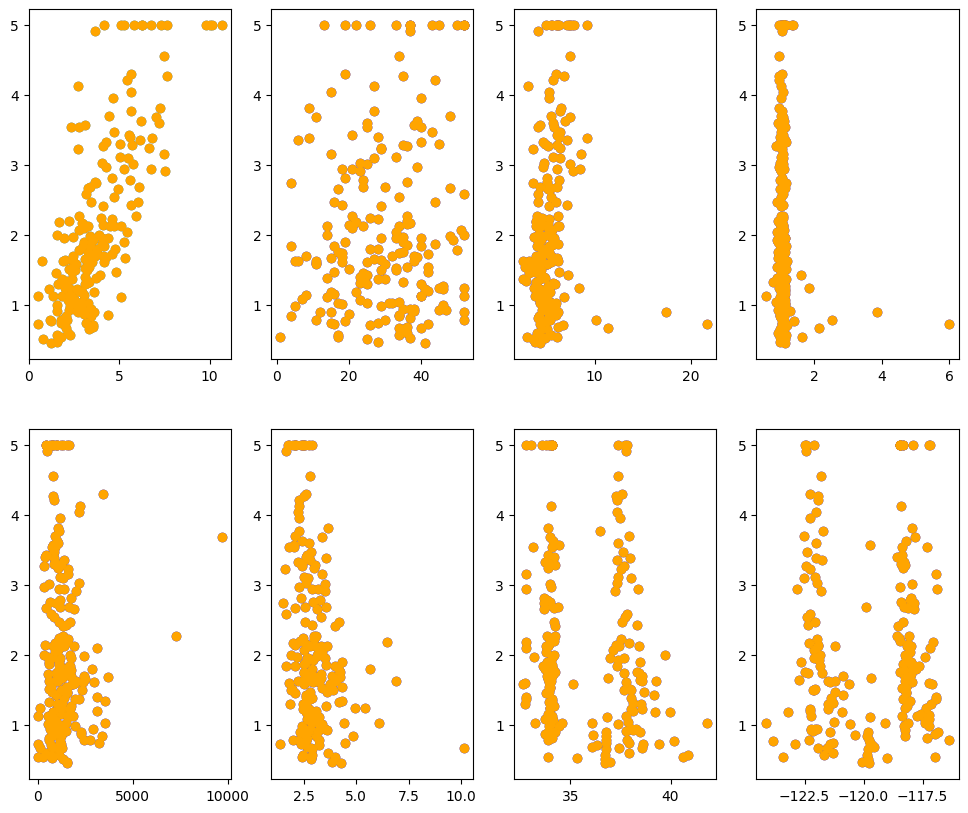

In [77]:
fig , ax = plt.subplots(2 , 4 , figsize=(12 , 10))

X_test_sml = X_test[:200]
Y_test_sml = Y_test[:200]

ax[0 ,0].scatter(X_test_sml['MedInc'] , Y_test_sml )
ax[0 ,0].scatter(X_test_sml['MedInc'] , Y_test_sml , color = 'orange')
ax[0 ,1].scatter(X_test_sml['HouseAge'] ,Y_test_sml , color = 'blue')
ax[0 ,1].scatter(X_test_sml['HouseAge'] ,Y_test_sml , color = 'orange')
ax[0 ,2].scatter(X_test_sml['AveRooms'] , Y_test_sml , color = 'blue')
ax[0 ,2].scatter(X_test_sml['AveRooms'] , Y_test_sml , color = 'orange' )
ax[0, 3].scatter(X_test_sml['AveBedrms'] , Y_test_sml , color = 'blue')
ax[0, 3].scatter(X_test_sml['AveBedrms'] , Y_test_sml , color = 'orange')
ax[1 ,0].scatter(X_test_sml['Population'] , Y_test_sml , color = 'blue')
ax[1 ,0].scatter(X_test_sml['Population'] , Y_test_sml , color = 'orange')
ax[1 ,1].scatter(X_test_sml['AveOccup'] , Y_test_sml , color = 'blue')
ax[1 ,1].scatter(X_test_sml['AveOccup'] , Y_test_sml , color = 'orange')
ax[1 ,2].scatter(X_test_sml['Latitude'] , Y_test_sml , color = 'blue')
ax[1 ,2].scatter(X_test_sml['Latitude'] , Y_test_sml , color = 'orange')
ax[1 ,3].scatter(X_test_sml['Longitude'] , Y_test_sml , color = 'blue')
ax[1 ,3].scatter(X_test_sml['Longitude'] , Y_test_sml , color = 'orange')

plt.show()

In [82]:
X_200 = X_train.iloc[200]

In [113]:
print(f'predict: {np.dot(X_test_norm[69] , w_wt)+b_wt}')
print(Y_test.iloc[69])

predict: [2.12373819]
2.247
